In [1]:
import pandas as pd
sky = pd.read_csv('Skyserver.csv')
sky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [2]:
sky['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

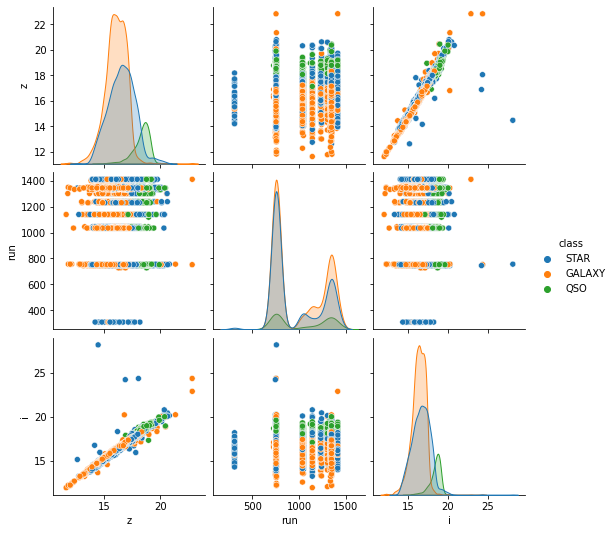

In [3]:
import seaborn as sns
sns.pairplot(hue='class',data=sky[['z','run','i','class']])

In [5]:
import numpy as np
features = list(sky.columns)
features.remove('class')

x = sky[features]
y = sky['class']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1,stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(7000, 17) (3000, 17) (7000,) (3000,)


In [6]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
pred = gnb.fit(x_train,y_train).predict(x_test)
print('Accuracy Score : ',gnb.score(x_test,y_test))

Accuracy Score :  0.799


In [7]:
gnb.predict_proba(x_test)[[0,13,68]]

array([[8.26737014e-01, 4.43137039e-02, 1.28949282e-01],
       [5.39851854e-05, 9.64092748e-02, 9.03536740e-01],
       [8.32868012e-01, 4.48282737e-02, 1.22303715e-01]])

In [8]:
gnb.predict(x_test)[[0,13,68]]

array(['GALAXY', 'STAR', 'GALAXY'], dtype='<U6')

In [10]:
from sklearn.metrics import classification_report
pred = gnb.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      GALAXY       0.74      0.97      0.84      1499
         QSO       0.00      0.00      0.00       255
        STAR       0.91      0.75      0.83      1246

    accuracy                           0.80      3000
   macro avg       0.55      0.58      0.56      3000
weighted avg       0.75      0.80      0.76      3000



C:\Users\suhye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suhye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\suhye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1327